In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    
    def __init__(self, in_features=4,h1=8,h2=9,out_features=3):
        # how many layers?
        
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1) # fc: fully connected
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
        #input layer (4 features) --> h1 N -->h2 N --->output (3 classes)
        
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [7]:
torch.manual_seed(32)
model = Model()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('iris.csv')

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [13]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [24]:
X = df.drop('target',axis=1)
y = df['target']

In [25]:
type(y)

pandas.core.series.Series

In [26]:
# convert to numpy array
X = X.values
y = y.values

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
# this also shuffle our data. so we don't need to worry about that
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [30]:
# convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [31]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [32]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# lr = 0.01 den başlat, error azalmıyorsa lr yi azalt


In [33]:
model.parameters()

<generator object Module.parameters at 0x12bdaf120>

In [38]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [35]:
# RECOMMED: STARTING SMALL ON YOUR EPOCHS, IF YOU THEN FOR A LARGE DATASET
# AND THEN LATER ON PLOT THE LOST FUNCTİION WHICH WILL SHOW YOU HOW TO
#DO IN JUST A SECOND AND DECIDE IF YOU NEED TO TRAIN FOR MORE EPOCHS AND
# YOU MAYBE RUNNING AGAIN WHAT IS AN EPOCH

# An epoch, 1 run through all the training data
epochs = 100
losses = []

for i in range(epochs):
    
    # Forward and get a prediction
    
    y_pred = model.forward(X_train)
    
    # Calculate loss/error
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')
        
    # BACKPROP
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1507115364074707
Epoch 10 and loss is: 0.9377315640449524
Epoch 20 and loss is: 0.779825747013092
Epoch 30 and loss is: 0.6099401116371155
Epoch 40 and loss is: 0.40079930424690247
Epoch 50 and loss is: 0.25436320900917053
Epoch 60 and loss is: 0.15053053200244904
Epoch 70 and loss is: 0.10086948424577713
Epoch 80 and loss is: 0.08128314465284348
Epoch 90 and loss is: 0.07231428474187851


Text(0.5, 0, 'Epoch')

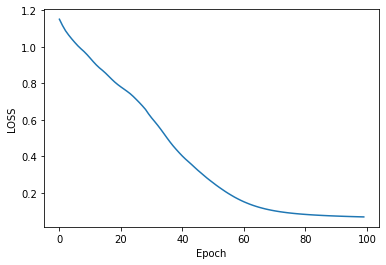

In [36]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [48]:
# test 
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [49]:
loss

tensor(0.0581)

In [54]:
correct = 0
total = 0

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}.) {str(y_val)}  {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
        total += 1

print(f'We got {correct} correct!')
print(f'We got {total} total!')
        

1.) tensor([-2.1252,  4.8064, -0.8628])  1
2.) tensor([-1.7985,  5.3098, -1.5449])  1
3.) tensor([  6.3542,   0.8438, -10.0541])  0
4.) tensor([-3.9123,  4.5958,  1.1693])  1
5.) tensor([-7.4713,  3.2021,  5.7853])  2
6.) tensor([-10.4976,   1.6459,   9.6297])  2
7.) tensor([  6.3201,   0.9917, -10.1532])  0
8.) tensor([  7.0468,   0.7059, -10.9137])  0
9.) tensor([-7.2061,  3.3477,  5.3565])  2
10.) tensor([-9.3960,  2.5759,  8.1033])  2
11.) tensor([-9.8808,  2.3475,  8.7141])  2
12.) tensor([ 6.2748,  0.6655, -9.7613])  0
13.) tensor([-9.3142,  2.1880,  8.1947])  2
14.) tensor([-3.7803,  4.5050,  1.0752])  1
15.) tensor([-7.8657,  3.0117,  6.2303])  2
16.) tensor([-1.8867,  5.1572, -1.3345])  1
17.) tensor([-5.7006,  3.5030,  3.6696])  2
18.) tensor([  7.1789,   0.7369, -11.1350])  0
19.) tensor([-3.2944,  4.7931,  0.3475])  1
20.) tensor([-7.7665,  3.7629,  5.7095])  2
21.) tensor([  6.6499,   0.7889, -10.4252])  0
22.) tensor([  7.4357,   0.8918, -11.6600])  0
23.) tensor([-9.7584

### FINALLT LETS SHOW YOU HOW TO SAVE THE TRAIN MODEL TO A FILE.
### LUCKILY PYTORCH MAKES IT EASY TO SIMPLY SAY TORCH TO SAVE

In [64]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [65]:
new_model = Model() # ?? W,b
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [66]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [71]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [72]:
with torch.no_grad():
    print(new_model(mystery_iris))

tensor([  5.9522,   1.5596, -10.0054])
